<a href="https://colab.research.google.com/github/pasumarthi/Backprop/blob/master/Session4/Assignment4B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**



```
# This is formatted as code

```

Reduce parameters ,MaxPooling,Dropout 1*1

Added Dropout to reduce difference training and test data accuracyTried . And also increase training accuracy

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


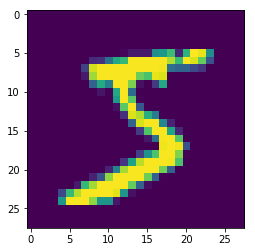

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(8,(3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(Conv2D(16,(3, 3), activation='relu')) #24
model.add(Conv2D(32,(3, 3), activation='relu')) #22
model.add(Dropout(0.10))


model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Conv2D(8,(1, 1), activation='relu'))#11   

model.add(Conv2D(16,(3,3), activation='relu')) #9
model.add(Conv2D(32, (3, 3), activation='relu')) #7

model.add(Dropout(0.10))
model.add(MaxPooling2D(pool_size=(2, 2)))#4
model.add(Conv2D(8,(1, 1), activation='relu'))#5

#model.add(Conv2D(32,(3,3), activation='relu')) #3

#model.add(Dropout(0.10))
model.add(Conv2D(10,(3,3)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 8)         264       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 16)          1168      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1,validation_split=0.1)
#model.fit(X_train, Y_train,batch_size=128,nb_epoch=50,verbose=1,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 113us/step - loss: 0.5021 - acc: 0.8310 - val_loss: 0.1502 - val_acc: 0.9578
Epoch 2/20
54000/54000 [==============================] - 3s 63us/step - loss: 0.1421 - acc: 0.9557 - val_loss: 0.1044 - val_acc: 0.9710
Epoch 3/20
54000/54000 [==============================] - 3s 64us/step - loss: 0.1043 - acc: 0.9676 - val_loss: 0.0809 - val_acc: 0.9788
Epoch 4/20
54000/54000 [==============================] - 3s 63us/step - loss: 0.0850 - acc: 0.9740 - val_loss: 0.0768 - val_acc: 0.9772
Epoch 5/20
54000/54000 [==============================] - 3s 63us/step - loss: 0.0747 - acc: 0.9769 - val_loss: 0.0636 - val_acc: 0.9825
Epoch 6/20
54000/54000 [==============================] - 3s 63us/step - loss: 0.0670 - acc: 0.9799 - val_loss: 0.0629 - val_acc: 0.9830
Epoch 7/20
54000/54000 [==============================] - 3s 63us/step - loss: 0.0589 - acc: 0.9817 - val_loss: 0.0525 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.030269168970547617, 0.99]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.1876291e-07 2.9881260e-08 1.0907111e-05 2.3678896e-05 1.3233376e-12
  1.4347957e-07 6.7933965e-15 9.9995828e-01 1.5109617e-08 6.7717842e-06]
 [4.8871684e-06 3.6784643e-04 9.9962580e-01 3.3987460e-09 1.6981005e-07
  5.4394605e-10 1.2025849e-06 6.7083946e-08 2.3061865e-08 5.6691565e-11]
 [6.8668180e-07 9.8955500e-01 6.4495856e-05 5.3294499e-08 9.9187205e-03
  6.3213265e-06 3.0406981e-04 9.2699978e-05 1.7316828e-05 4.0618725e-05]
 [9.9991488e-01 3.1343571e-08 9.8540768e-06 2.1161359e-09 1.7712919e-08
  2.6560551e-07 6.3628322e-05 6.1657848e-09 6.7878324e-07 1.0665084e-05]
 [7.4659307e-12 6.3906406e-08 2.9821330e-12 1.6266177e-15 9.9999547e-01
  4.5674063e-14 3.9871800e-08 2.9173962e-11 1.4987488e-10 4.4209551e-06]
 [7.1622901e-07 9.9891281e-01 7.6080207e-05 4.1953214e-09 8.7109138e-04
  3.3853175e-07 5.0591640e-05 4.5737001e-05 5.9584145e-06 3.6663405e-05]
 [2.8476551e-13 2.7460302e-07 5.0723183e-11 4.0196787e-12 9.9977821e-01
  3.9926257e-10 1.4282135e-10 1.6212326e-10 1.8068722e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

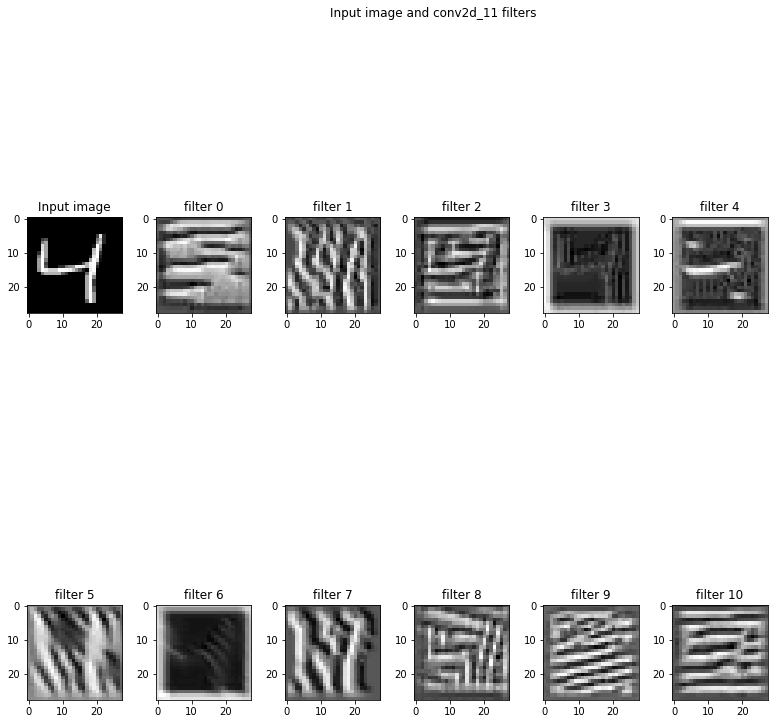

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_11'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()